In [1]:
from pylab import *
import scipy
import ruptures as rpt
%matplotlib inline

In [2]:
import mat2python
data,trial,classes=mat2python.mat2python(repetition_number=0)
#sampling rate 10 Hz

 I am loading the 0 repetition of the protocol


Consider only oxy data, discard the others

(2671, 52)


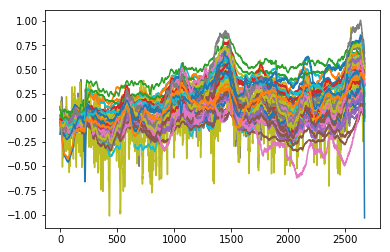

In [3]:
oxy=data[:,0:52]
plot(oxy)#oxy
figure()
'''plot(data[:,52:104])#deoxy
figure()
plot(data[:,104:156])#oxy+#deoxy'''
print(shape(oxy))


Protocol consists of 12 seconds of computation, followed by 28 s of rest. Intially there are 24 s of rest before starting.

Using matplotlib backend: Qt5Agg


array([122, 279, 121, 279, 121, 279, 121, 279, 121, 279, 121], dtype=uint32)

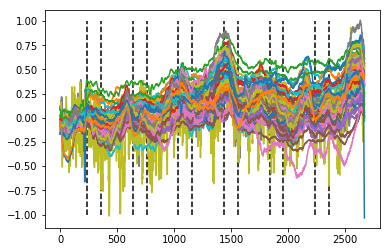

In [6]:
%matplotlib 
plot(oxy)#oxy
vlines(trial,-1,1,linestyles="--")
diff(trial)

There are three regions that are assumed to be involved in the arithmetic tasks.

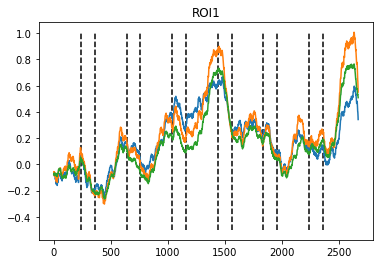

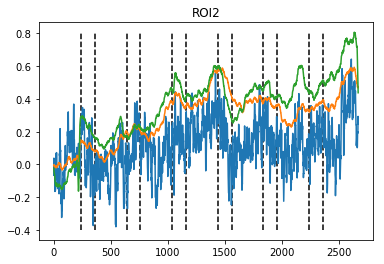

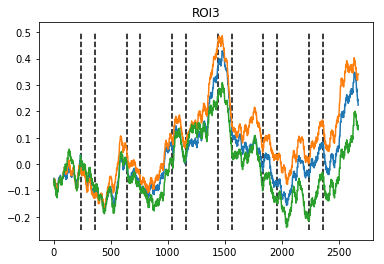

In [4]:
roi1=[46,47,48]
roi2=[18,28,29]
roi3=[13, 23, 24]
plot(oxy[:,roi1],label="ROI1")
vlines(trial,-0.5,1,linestyles="--")
title("ROI1")
figure()
vlines(trial,-0.4,0.8,linestyles="--")
plot(oxy[:,roi2],label="ROI2")
title("ROI2")
figure()
vlines(trial,-0.25,0.5,linestyles="--")
plot(oxy[:,roi3],label="ROI3")
title("ROI3")
#legend()

12
12


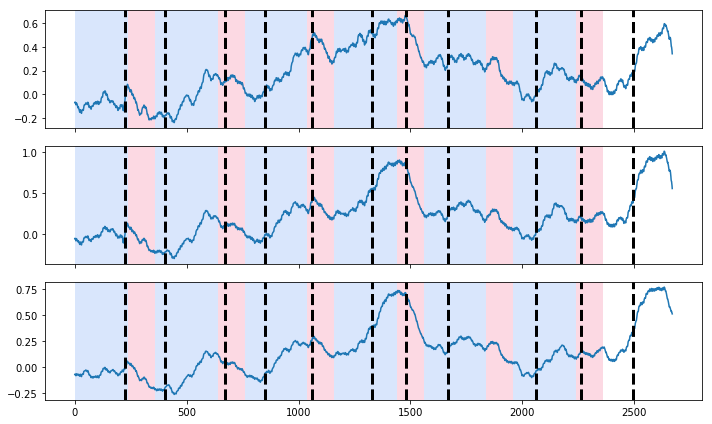

In [5]:
# detection
algo = rpt.Dynp(model="mahalanobis",min_size=10).fit(oxy[:,roi1+roi2+roi3]) #equivalent to rpt.Dynp(model="mahalanobis", params={"metric": inv(M)})
M_result = algo.predict(n_bkps=11)

rpt.display(oxy[:,roi1], trial,M_result)
print(len(M_result))
print(len(trial))

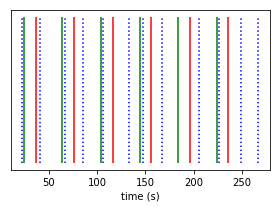

In [73]:
figure(figsize=(4,3))
t=arange(0,len(oxy))*0.1#it converts frame in time
#plot(t,oxy[:,roi1+roi2+roi3],lw="0.5",alpha=0.7)
xmin,xmax,ymin,ymax=gca().axis()
vlines(trial[::2]*0.1,ymin,ymax,linestyles="-",color="g")#start mental operation
vlines(trial[1::2]*0.1,ymin,ymax,linestyles="-",color="r")#start pause
vlines(array(M_result)*0.1,ymin,ymax,linestyles=":",color="b")#change point estimate
xlabel("time (s)")
tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',       # ticks along the right edge are off
    left='off',         # ticks along the left edge are off
    labelleft=False) # labels along the bottom edge are off
tight_layout()
savefig("./figure/multiple_changepoint.pdf")

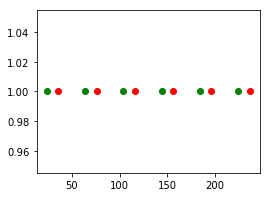

In [37]:
figure(figsize=(4,3))
t=arange(0,len(oxy))*0.1#it converts frame in time
plot(trial[::2]*0.1,ones(len(trial[::2])),"o",color="g")#start mental operation
plot(trial[1::2]*0.1,ones(len(trial[1::2])),"o",color="r")#start pause


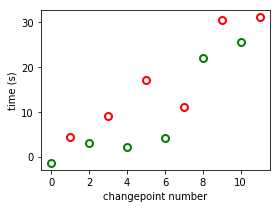

In [72]:
figure(figsize=(4,3))
plot(arange(0,len(M_result))[::2],(M_result[::2]-trial[::2])*0.1,"wo",mec="g",mew=2,ms=7)
plot(arange(0,len(M_result))[1::2],(M_result[1::2]-trial[1::2])*0.1,"wo",mec="r",mew=2,ms=7)
xlabel("changepoint number")
ylabel("time (s)")
tight_layout()
savefig("./figure/delay.pdf")

(<matplotlib.figure.Figure at 0x7f2bc86186d8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bc3fca5f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2bc3c21208>], dtype=object))

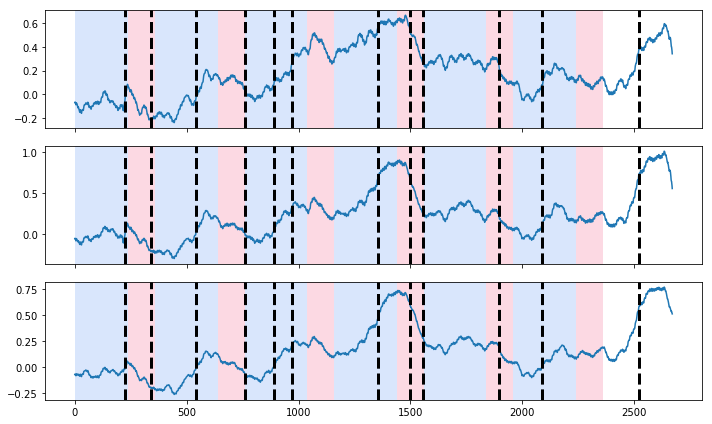

In [47]:
# detection
algo = rpt.BottomUp(model="rbf").fit(oxy[:,roi1+roi2+roi3])
result = algo.predict(n_bkps=len(trial))
rpt.display(oxy[:,roi1], trial,result)


In [18]:
algo.predict?

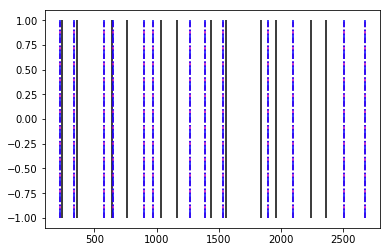

In [30]:
# detection
algo = rpt.BottomUp(model="rbf").fit(oxy)
result = algo.predict(n_bkps=len(trial))
vlines(trial,-1,1,linestyles="-",colors="k")
vlines(result,-1,1,linestyles="--",colors="m")

algo = rpt.BottomUp(model="rbf").fit(oxy[:,roi1+roi2+roi3])
result1 = algo.predict(n_bkps=len(trial))

vlines(result,-1,1,linestyles="-.",colors="b")


By using the three roi it is equivalent than using all channels

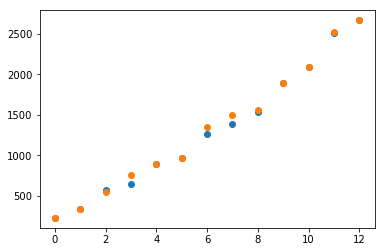

In [37]:
(array(result)-array(result1))
plot(result,"o")
plot(result1,"o")

(<matplotlib.figure.Figure at 0x7f2bc3d92198>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bc3d5b630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2bc3cdc240>], dtype=object))

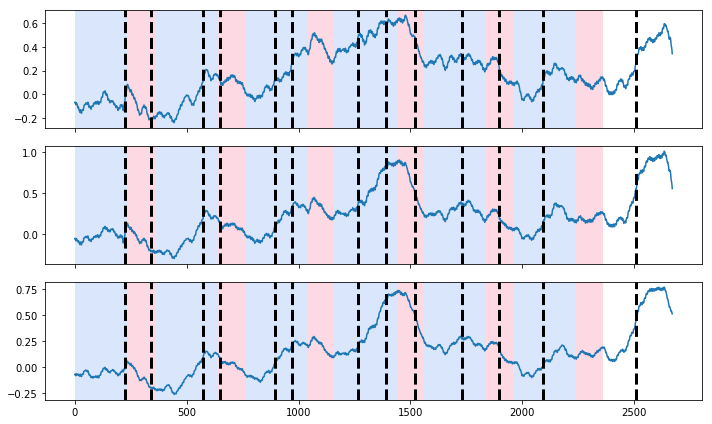

In [46]:
algo = rpt.BottomUp(model="l2").fit(oxy)
result = algo.predict(pen=25)
rpt.display(oxy[:,roi1], trial,result)

In [14]:
from scipy import io
def mat2python(repetition_number=0):
	'''This function read the SO1.mat file. The experiment is repeated 3 times, repetition_number can take values 0,1,2'''
	print(" I am loading the "+str(repetition_number)+" repetition of the protocol")
	oxy,fs,trial,y,classes=scipy.io.loadmat("S01.mat")["data"][repetition_number][0][0,0]
	return oxy,trial,classes

 I am loading the 0 repetition of the protocol


NameError: name 'scipy' is not defined

(<matplotlib.figure.Figure at 0x7fe44593b470>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4608e7080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe4608d6128>], dtype=object))

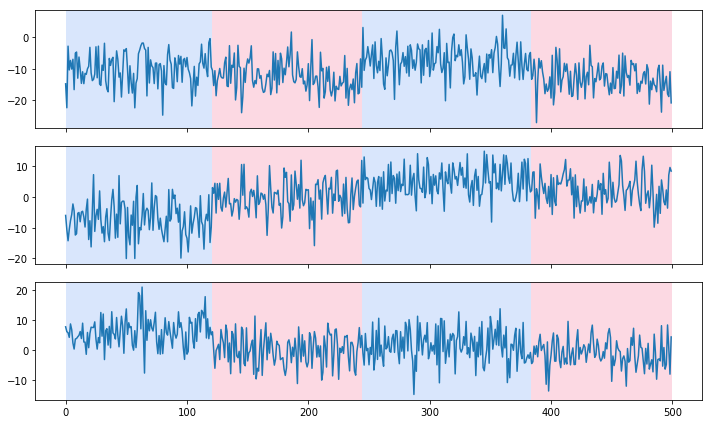

In [10]:
n, dim = 500, 3  # number of samples, dimension
n_bkps, sigma = 3, 5  # number of change points, noise standart deviation
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)
rpt.display(signal, bkps)


In [11]:
bkps

[121, 245, 384, 500]